In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier,plot_tree
import warnings
warnings.simplefilter('ignore')

In [2]:
train = pd.read_csv('kagg_train_titanic.csv')
test = pd.read_csv('kagg_test_titanic.csv')

In [3]:
train

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived,Age,SibSp,Parch,Fare
0,0,1,1,0,1,0,22.0,1,0,7.2500
1,0,0,0,0,0,1,38.0,1,0,71.2833
2,0,1,0,0,1,1,26.0,0,0,7.9250
3,0,0,0,0,1,1,35.0,1,0,53.1000
4,0,1,1,0,1,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...
884,1,0,1,0,1,0,27.0,0,0,13.0000
885,0,0,0,0,1,1,19.0,0,0,30.0000
886,0,1,0,0,1,0,28.0,1,2,23.4500
887,0,0,1,0,0,1,26.0,0,0,30.0000


In [4]:
test

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
0,0,1,1,1,0,34.5,0,0,7.8292
1,0,1,0,0,1,47.0,1,0,7.0000
2,1,0,1,1,0,62.0,0,0,9.6875
3,0,1,1,0,1,27.0,0,0,8.6625
4,0,1,0,0,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...,...,...
413,0,1,1,0,1,27.0,0,0,8.0500
414,0,0,0,0,0,39.0,0,0,108.9000
415,0,1,1,0,1,38.5,0,0,7.2500
416,0,1,1,0,1,27.0,0,0,8.0500


In [5]:
train['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [6]:
X = train.drop('Survived', axis =1)

In [7]:
y = train['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state= 101)

In [9]:
model_1 = DecisionTreeClassifier()

In [10]:
param = {'criterion': ['gini', 'entropy'],
         'max_depth': [2 ,3 ,4],
         'max_features': ['auto', 'sqrt', 'log2'],
         'min_impurity_decrease': [0.05, 0.1, 0, 0.5, 1],
         'min_samples_split': [2, 3],
         'max_leaf_nodes': [2,3,4,5,6,7,9,10,12, 15]}

In [11]:
grid_model = GridSearchCV(model_1, param_grid = param, cv = 5)

In [12]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 9, 10, 12, 15],
                         'min_impurity_decrease': [0.05, 0.1, 0, 0.5, 1],
                         'min_samples_split': [2, 3]})

In [13]:
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 15,
 'min_impurity_decrease': 0,
 'min_samples_split': 2}

In [14]:
grid_pred = grid_model.predict(X_test)

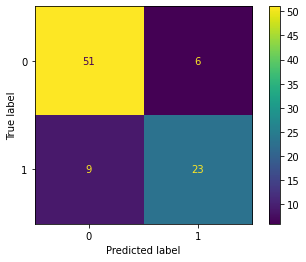

In [15]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [16]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        57
           1       0.79      0.72      0.75        32

    accuracy                           0.83        89
   macro avg       0.82      0.81      0.81        89
weighted avg       0.83      0.83      0.83        89



<Figure size 720x432 with 0 Axes>

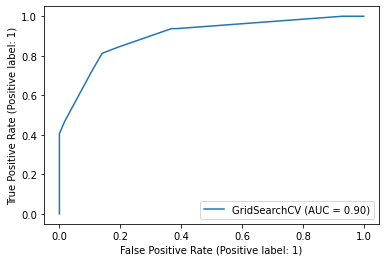

In [17]:
plt.figure(figsize = (10,6))
plot_roc_curve(grid_model, X_test, y_test)

In [18]:
tree_model =  DecisionTreeClassifier(criterion = 'gini',max_depth = 3,max_features= 'sqrt',max_leaf_nodes= 12,min_impurity_decrease= 0,min_samples_split= 2)

In [19]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=12,
                       min_impurity_decrease=0)

In [20]:
tree_model.feature_importances_

array([0.        , 0.1873233 , 0.67601287, 0.        , 0.00616612,
       0.06992404, 0.05049056, 0.0100831 , 0.        ])

In [21]:
pd.DataFrame(index=X.columns,data=tree_model.feature_importances_,columns=['Feature Importance']).sort_values(by = 'Feature Importance')

,Feature Importance
Pclass_2,0.000000
Embarked_Q,0.000000
Fare,0.000000
Embarked_S,0.006166
Parch,0.010083
SibSp,0.050491
Age,0.069924
Pclass_3,0.187323
Sex_male,0.676013


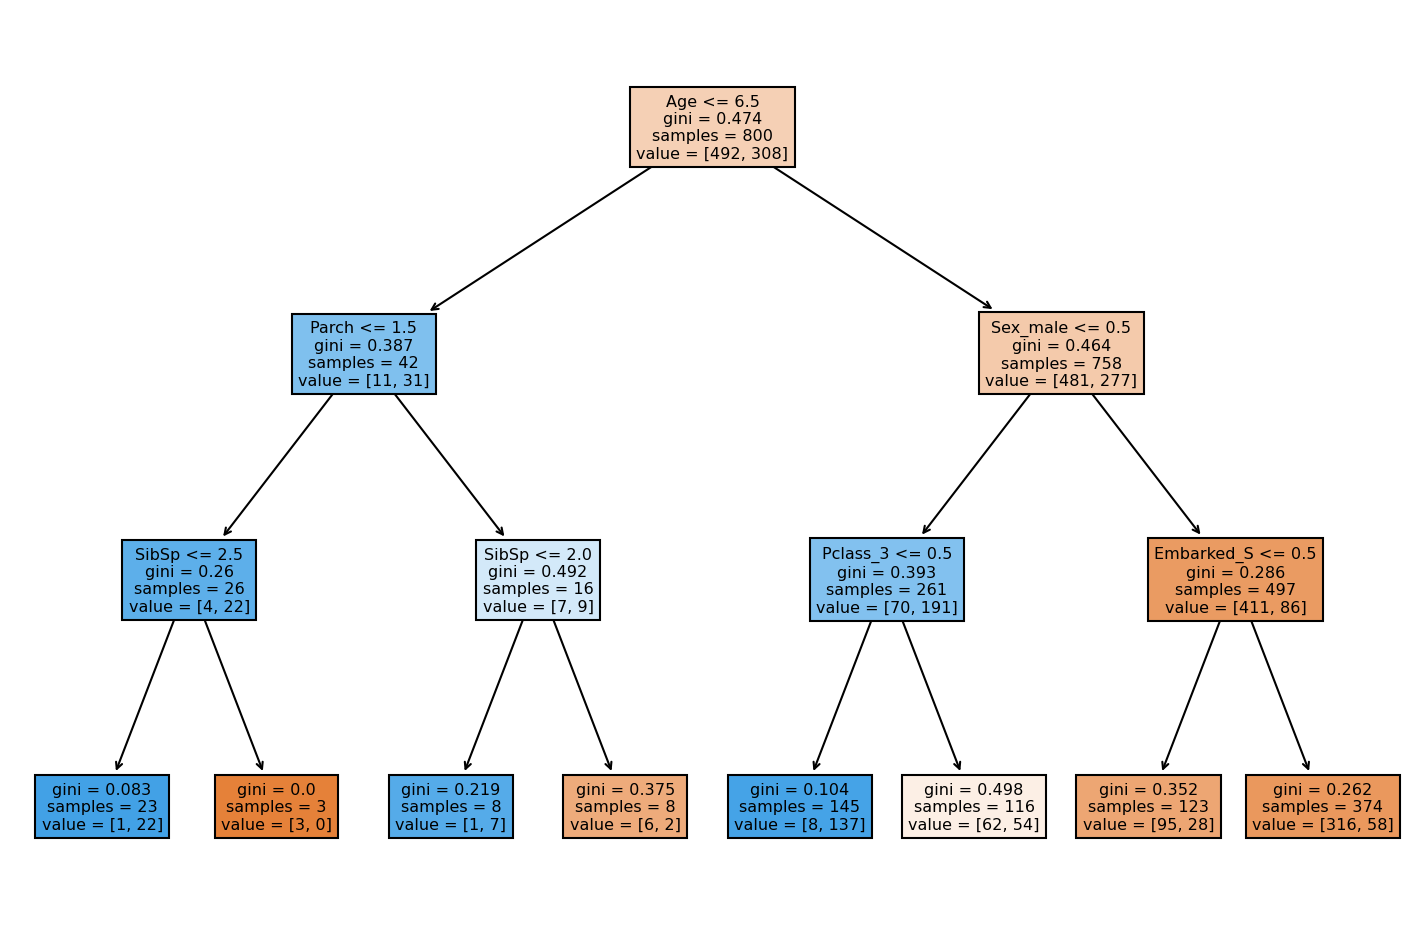

In [22]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree_model,filled=True,feature_names=X.columns);

In [23]:
tree_pred = tree_model.predict(test)

In [24]:
new = pd.read_csv('gender_submission.csv')

In [25]:
new['Survived'] = tree_pred

In [30]:
new['Survived'] .value_counts()

0    327
1     91
Name: Survived, dtype: int64

In [31]:
new.to_csv('kaggle_titanic3.csv')

In [28]:
new

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
